##### 顯示圖片的三種方法
如果要透過 PyQt5 顯示圖片，常常會透過 QLabel、QGraphicsView 或 QPainter 這三種方法進行圖片的顯示，這篇教學會介紹這三種常用的方法。

##### 使用 QLabel + QPixmap 
QLabel 雖然是標籤元件 ( 參考「QLabel 標籤」 )，但也常作為圖片的顯示元件使用，如果要透過 QLabel 顯示圖片，必須搭配 QPixmap 方法一同使用，\
使用的基本方法如下：

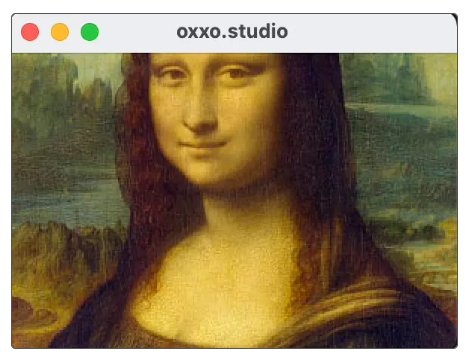

In [ ]:
from PyQt5 import QtWidgets
from PyQt5.QtGui import *
import sys

app = QtWidgets.QApplication(sys.argv)
MainWindow = QtWidgets.QMainWindow()
MainWindow.setObjectName("MainWindow")
MainWindow.setWindowTitle("oxxo.studio")
MainWindow.resize(300, 200)

label = QtWidgets.QLabel(MainWindow)    # 放入 QLabel
label.setGeometry(0, 0, 300, 200)       # 設定 QLabel 尺寸和位置

qpixmap = QPixmap()                     # 建立 QPixmap 物件
qpixmap.load('Data\image\烤雞.jpg')     # 讀取圖片
# 也可以寫成下面這樣
# qpixmap = QPixmap('mona.jpg')
label.setPixmap(qpixmap)                # 將 QPixmap 物件加入到 label 裡

MainWindow.show()
sys.exit(app.exec_())

QPixmap 物件除了使用 load 的方法讀圖片，也可以搭配 QImage 讀取圖片，下方的程式碼會使用 QImage 的做法：

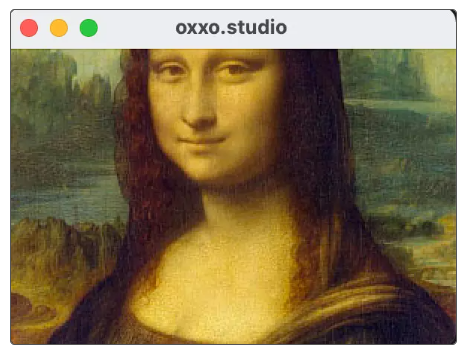

In [ ]:
from PyQt5 import QtWidgets
from PyQt5.QtGui import *
import sys

app = QtWidgets.QApplication(sys.argv)
MainWindow = QtWidgets.QMainWindow()
MainWindow.setObjectName("MainWindow")
MainWindow.setWindowTitle("oxxo.studio")
MainWindow.resize(300, 200)

label = QtWidgets.QLabel(MainWindow)
label.setGeometry(0, 0, 300, 200)

qpixmap = QPixmap()
qimg = QImage('Data\image\烤雞.jpg') # 讀取圖片
qpixmap = qpixmap.fromImage(qimg)    # 將圖片加入 QPixmap 物件中
label.setPixmap(qpixmap)             # 將 QPixmap 物件加入到 label 裡

MainWindow.show()
sys.exit(app.exec_())

建立 QPixmap 物件後，就能使用 scaled 方法產生不同尺寸的新物件，下方的程式碼值執行後，會在畫面中放入兩張不同尺寸的圖片。
* 一個 QLabel 裡只能存在一個 QPixmap 物件，因此如果要放入兩張圖片，需要使用兩個 QLable。
* 如果要調整圖片位置，可使用 QLabel 的 move 方法進行調整。

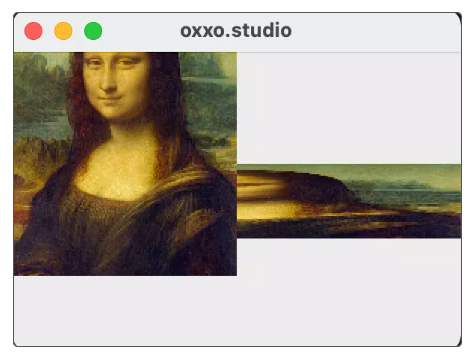

In [ ]:
from PyQt5 import QtWidgets
from PyQt5.QtGui import *
import sys

app = QtWidgets.QApplication(sys.argv)
MainWindow = QtWidgets.QMainWindow()
MainWindow.setObjectName("MainWindow")
MainWindow.setWindowTitle("oxxo.studio")
MainWindow.resize(300, 200)

label = QtWidgets.QLabel(MainWindow)  #  建立 QLabel
label.setGeometry(0, 0, 300, 200)
label2 = QtWidgets.QLabel(MainWindow) #  建立 QLabel
label2.setGeometry(0, 0, 300, 200)
label2.move(0, -50)                   # 調整位置

qpixmap = QPixmap()
qpixmap.load('Data\image\烤雞.jpg')
img1 = qpixmap.scaled(300,50)    # 建立圖片 1
label.setPixmap(img1)            # 加入圖片 1
img2 = qpixmap.scaled(150,200)   # 建立圖片 2
label2.setPixmap(img2)           # 加入圖片 2
MainWindow.show()
sys.exit(app.exec_())

##### 使用 QGraphicsView + QPixmap 
參考「QGraphicsView 顯示圖片」，透過建立 QGraphicsView 物件，就能搭配 QPixmap 方法顯示圖片，下方的程式碼執行後，會在畫面中放入蒙娜麗莎像。

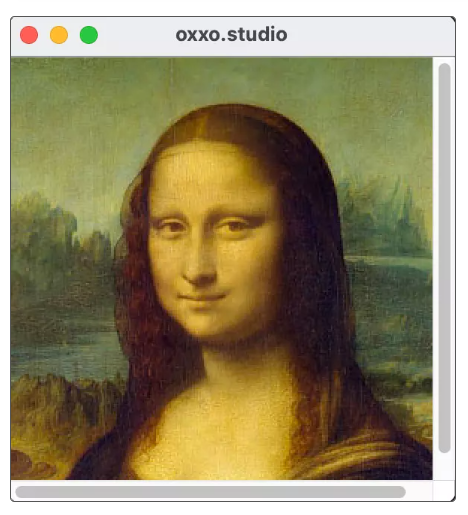

In [ ]:
from PyQt5 import QtWidgets
from PyQt5.QtGui import *
import sys

app = QtWidgets.QApplication(sys.argv)
MainWindow = QtWidgets.QMainWindow()
MainWindow.setObjectName("MainWindow")
MainWindow.setWindowTitle("oxxo.studio")
MainWindow.resize(300, 300)

grview = QtWidgets.QGraphicsView(MainWindow)  # 加入 QGraphicsView
grview.setGeometry(0, 0, 300, 300)            # 設定 QGraphicsView 位置與大小
scene = QtWidgets.QGraphicsScene()            # 加入 QGraphicsScene
scene.setSceneRect(0, 0, 200, 200)            # 設定 QGraphicsScene 位置與大小
img = QPixmap('Data\image\烤雞.jpg')          # 加入圖片
scene.addPixmap(img)                          # 將圖片加入 scene
grview.setScene(scene)                        # 設定 QGraphicsView 的場景為 scene

MainWindow.show()
sys.exit(app.exec_())

因為 setSceneRect 的定位是以「中心點」為主，如果要改成熟悉的「左上角」定位，就得透過簡單的數學公式換算，\
下方的程式碼執行後，除了會透過 scaled 調整尺寸，也會將場景定位在左上角 (20,20) 的位置。

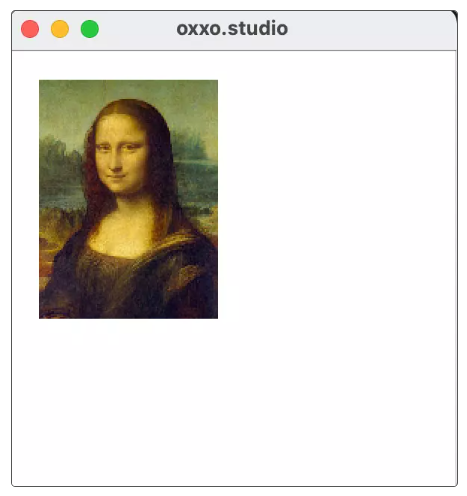

In [ ]:
from PyQt5 import QtWidgets
from PyQt5.QtGui import *
import sys

app = QtWidgets.QApplication(sys.argv)
MainWindow = QtWidgets.QMainWindow()
MainWindow.setObjectName("MainWindow")
MainWindow.setWindowTitle("oxxo.studio")
MainWindow.resize(300, 300)

grview = QtWidgets.QGraphicsView(MainWindow)
gw = 300
gh = 300
grview.setGeometry(0, 0, gw, gh)      # QGraphicsView 的長寬改成變數
scene = QtWidgets.QGraphicsScene()
img = QPixmap('Data\image\烤雞.jpg')
img_w = 120                           # 顯示圖片的寬度
img_h = 160                           # 顯示圖片的高度
img = img.scaled(img_w, img_h)        # 改變圖片尺寸
x = 20                                # 左上角 x 座標
y = 20                                # 左上角 y 座標
dx = int((gw - img_w) / 2) - x        # 修正公式
dy = int((gh - img_h) / 2) - y
scene.setSceneRect(dx, dy, img_w, img_h)
scene.addPixmap(img)
grview.setScene(scene)

MainWindow.show()
sys.exit(app.exec_())

如果要加入多張圖片，就要使用 QItem 的做法，下方的程式碼執行後，會在場景裡放入兩個圖片尺寸不同的 QItem。

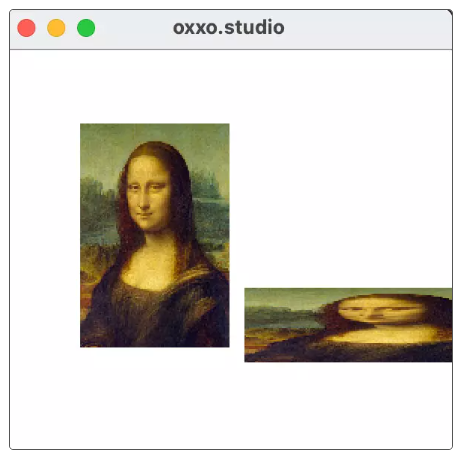

In [ ]:
from PyQt5 import QtWidgets
from PyQt5.QtGui import *
import sys

app = QtWidgets.QApplication(sys.argv)
MainWindow = QtWidgets.QMainWindow()
MainWindow.setObjectName("MainWindow")
MainWindow.setWindowTitle("oxxo.studio")
MainWindow.resize(300, 300)

grview = QtWidgets.QGraphicsView(MainWindow)  # 加入 QGraphicsView
grview.setGeometry(0, 0, 300, 300)            # 設定 QGraphicsView 位置與大小
scene = QtWidgets.QGraphicsScene()            # 加入 QGraphicsScene
scene.setSceneRect(0, 0, 200, 200)            # 設定 QGraphicsScene 位置與大小
img = QPixmap('Data\image\烤雞.jpg')          # 建立圖片
img1 = img.scaled(200,50)                     # 建立不同尺寸圖片
qitem1 = QtWidgets.QGraphicsPixmapItem(img1)  # 設定 QItem，內容是 img1
img2 = img.scaled(100,150)                    # 建立不同尺寸圖片
qitem2 = QtWidgets.QGraphicsPixmapItem(img2)  # 設定 QItem，內容是 img2
scene.addItem(qitem1)                         # 場景中加入 QItem
scene.addItem(qitem2)                         # 場景中加入 QItem
grview.setScene(scene)                        # 設定 QGraphicsView 的場景為 scene

MainWindow.show()
sys.exit(app.exec_())

使用 QPainter 
參考「QPainter 放入圖片」，透過 QPainter 的 drawImage 方法，就能顯示已經轉換成 QImage 的圖片，\
使用時需要搭配 QRect 指定圖片的左上角座標以及長寬，下方的程式碼執行後，畫面裡會出現一張蒙娜麗莎的畫像。

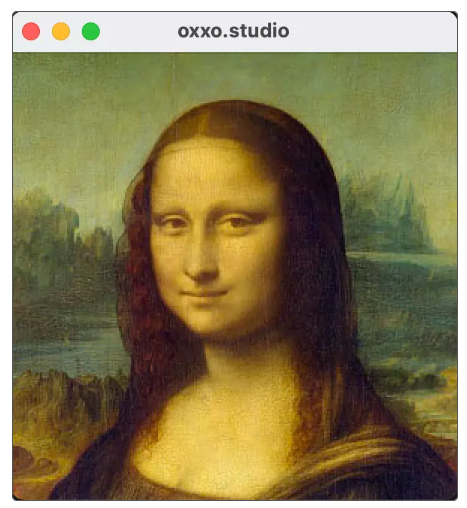

In [ ]:
from PyQt5 import QtWidgets
from PyQt5.QtGui import *
from PyQt5.QtCore import *
import sys

app = QtWidgets.QApplication(sys.argv)
MainWindow = QtWidgets.QMainWindow()
MainWindow.setObjectName("MainWindow")
MainWindow.setWindowTitle("oxxo.studio")
MainWindow.resize(300, 300)

def draw(self):
    qpainter = QPainter()
    qpainter.begin(MainWindow)

    qimage = QImage('Data\image\烤雞.jpg')
    w = qimage.size().width()
    h = qimage.size().height()
    qpainter.drawImage(QRect(20, 20, w, h), qimage)

    qpainter.end()

MainWindow.paintEvent = draw
MainWindow.show()
sys.exit(app.exec_())

修改 QRect 的參數，就能改變放入圖片的位置和大小，下方的程式碼執行後，畫面裡會出現兩張位置與大小不同的蒙娜麗莎像。

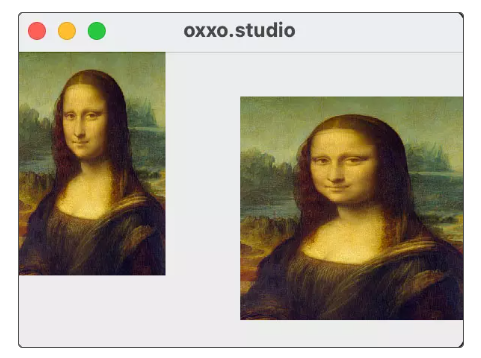

In [ ]:
from PyQt5 import QtWidgets
from PyQt5.QtGui import *
from PyQt5.QtCore import *
import sys

app = QtWidgets.QApplication(sys.argv)
MainWindow = QtWidgets.QMainWindow()
MainWindow.setObjectName("MainWindow")
MainWindow.setWindowTitle("oxxo.studio")
MainWindow.resize(300, 200)

def draw(self):
    qpainter = QPainter()
    qpainter.begin(MainWindow)

    qimage = QImage('Data\image\烤雞.jpg')
    qpainter.drawImage(QRect(0, 0, 100, 150), qimage)
    qpainter.drawImage(QRect(150, 30, 150, 150), qimage)

    qpainter.end()

MainWindow.paintEvent = draw
MainWindow.show()
sys.exit(app.exec_())